In [1]:
#!/usr/bin/python3

import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
Mpc = 3.0857e22  # Mega parsec in meters

figuresize = 4
plt.rcParams["figure.figsize"] = (figuresize, figuresize*3/5)
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams['svg.fonttype'] = 'none'

# Velocity profiles

In the following two velocity profiles for galaxy clsuters will be calculated and visualized in a plot for comparison.

## Parameters definition
define parameters of the galaxy cluster:

- `r_c` core radius
- `r` border radius

parameters for the velocity profiles VP1 & VP2:
- `v_c` core velocity for VP1 in units of c
- `r_0` scale radius for VP2
- `v_t` scale velocity for VP2 in units of c

In [2]:
r_c = 0.2 * Mpc  # core radius
r = 2.8 * Mpc  # maximum radius

# parameters for VP1 & VP2
v_c = 50
r_0 = 1.2 * Mpc
v_t = 800

define parameters for images. Resolution `e` along x axis.

In [3]:
e = 8*8  # Resolution
radius = np.linspace(0, r, e)

## velocity profiles

In [4]:
def VP1(r):
    r = r/r_c
    return r * v_c


def VP2(r):
    r = r/r_0
    v = v_t * r / (1+r**2)
    return v

## Calculate

the VP1 and VP2

return average value

In [5]:
V1 = VP1(radius)
V2 = VP2(radius)
print("average velocity(VP1)", np.average(V1))
print("average velocity(VP2)", np.average(V2))

average velocity(VP1) 349.99999999999983
average velocity(VP2) 316.638327407126


In [6]:
def beta_model(x, y, z, n_eo, r_c, beta):
    return n_eo*(1+(x**2+y**2+z**2)/r_c**2)**(-beta * 3/2)


def n_e(x, y, z, n_eo, r_c, beta):
    r = np.sqrt(x**2+y**2+z**2)/r_c
    r_s = 1.7 * Mpc
    alpha = 1
    beta = 0.7
    epsilon = 2.5
    return n_eo*r**(-alpha / 2) / (1+r**2)**(3*beta/2 - alpha/2) / (1+(r*r_c/r_s)**3)**(epsilon/2/3)

### Integrands
for relative intensity chnage with VP1 and VP2

In [7]:
def integrand_relInt_VP1(t, d, theta, phi, n_eo, r_c, beta, rot):
    return G_nu * sigma_T * np.dot(VP1(theta*t, t-d, phi*t, rot), np.array([theta, 1, phi])) * n_e(theta*t, t-d, phi*t, n_eo, r_c, beta)


def integrand_relInt_VP2(t, d, theta, phi, n_eo, r_c, beta, rot):
    return G_nu * sigma_T * np.dot(VP2(theta*t, t-d, phi*t, rot), np.array([theta, 1, phi])) * n_e(theta*t, t-d, phi*t, n_eo, r_c, beta)

### Velocity profiles and rotation (inclination)

rotationg velocity vector field with VP1 and VP2. Rotated by an rotation matrix to match inclination and rotation along the line of sight defined above

In [8]:
def VP1(r):
    v_c = 50
    r = r/r_c
    return r * v_c


def VP2(r):
    r_0 = 1.2
    r = r/r_0
    v_t = 800
    v = v_t * r / (1+r**2)
    return v

### Integradion function
Integrate integrand `integr` with `args`

In [9]:
def integrate(args):
    Result[Result != 0] = 0
    integr, t1, t2, d, Theta, Phi, n_eo, r_c, beta, rot, threats = args[0], args[1],  args[
        2],  args[3],  args[4],  args[5],  args[6],  args[7],  args[8],  args[9],  args[10]
    section_x = args[11]
    section_y = args[12]
    sectionsize = int(e/threats)
    for i in range(sectionsize*section_x, sectionsize*(section_x+1)):
        for j in range(sectionsize*section_y, sectionsize*(section_y+1)):
            theta = Theta[i, j]
            phi = Phi[i, j]
            I = quad(integr, t1[i, j], t2[i, j], args=(
                d, theta, phi, n_eo, r_c, beta, rot))
            Result[i, j] = np.around(I[0], decimals=10)
    return Result.copy()

## Plots
### svg's
Generate plot for VP1 and VP2. Also a normalized Prot to compare VP1 and VP2 along the x-axis.

Save the plots as svg with latex text.

In [10]:
figuresize = 8
plt.rcParams["figure.figsize"] = (figuresize, figuresize*3/5)
plt.plot(radius/r_c, V1, label='VP1')
plt.plot(radius/r_c, V2, label='VP2')
plt.xlabel("r / \$r_c\$")
plt.ylabel("\$v / \si{\kilo\meter\per\second} \$")
plt.legend()
plt.savefig("figs/velocityProfiles.svg")
plt.close()

### show

generate plots again but show them this time (optional export as PNG)

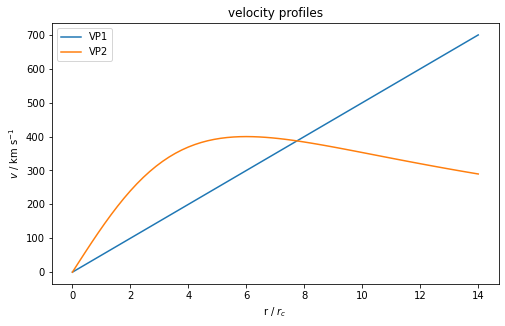

In [11]:
figuresize = 4
plt.rcParams["figure.figsize"] = (figuresize, figuresize*3/5)
plt.plot(radius/r_c, V1, label='VP1')
plt.plot(radius/r_c, V2, label='VP2')
plt.xlabel("r / $r_c$")
plt.ylabel("$v$ / km s$^{-1}$")
plt.legend()
plt.title("velocity profiles")
# plt.savefig("figs/P2d-solidBody-2over"+str(angle)+"pi.png")
plt.show()